# Quantifying Shakespeare

In [10]:
from io import TextIOWrapper

def read_file(filename: str) -> list[str]:
    """Given the name of a file, return a list of its lines."""
    lines: list[str] = []
    file: TextIOWrapper = open(filename, "r", encoding="utf8")
    for line in file:
        line = line.strip()
        line = line.lower()
        if line != "":
            lines.append(line)
    return lines


shakespeare_lines: list[str] = read_file("./shakespeare.txt")
print(len(shakespeare_lines))

141160


The next step of our analysis is to count the letters in the lines list one-by-one to find the frequency of use of each letter.

In [11]:
def tally(counts: dict[str, int], key: str) -> None:
    """Mutate counts to increment a key by 1 if it exists or initialize to 1."""
    if key in counts: 
        counts[key] += 1
    else:
        counts[key] = 1


def count_letters(lines: list[str]) -> dict[str, int]:
    """Count frequencies of all letters in a list of strings."""
    counts: dict[str, int] = {}
    for line in lines:
        for char in line:
           if char >= 'a' and char <= 'z':
                tally(counts, char)
    return counts


shakespeare_letters: dict[str, int] = count_letters(shakespeare_lines)
print(shakespeare_letters)

{'t': 354308, 'h': 255813, 'e': 482192, 'p': 61613, 'r': 252159, 'o': 332872, 'j': 4912, 'c': 92039, 'g': 72847, 'u': 137435, 'n': 260743, 'b': 64024, 'k': 37801, 'f': 86156, 'm': 117666, 'l': 180852, 'w': 96258, 's': 266884, 'i': 269501, 'a': 310075, 'y': 99549, 'd': 158865, 'v': 40250, 'x': 5364, 'z': 1807, 'q': 3953}


lets create a vizualization of this data with a bar chart.

In [14]:
items_in_dict: list[tuple[str, int]] = list(shakespeare_letters.items())
items_in_dict = sorted(items_in_dict)
print(items_in_dict)

[('a', 310075), ('b', 64024), ('c', 92039), ('d', 158865), ('e', 482192), ('f', 86156), ('g', 72847), ('h', 255813), ('i', 269501), ('j', 4912), ('k', 37801), ('l', 180852), ('m', 117666), ('n', 260743), ('o', 332872), ('p', 61613), ('q', 3953), ('r', 252159), ('s', 266884), ('t', 354308), ('u', 137435), ('v', 40250), ('w', 96258), ('x', 5364), ('y', 99549), ('z', 1807)]


<BarContainer object of 26 artists>

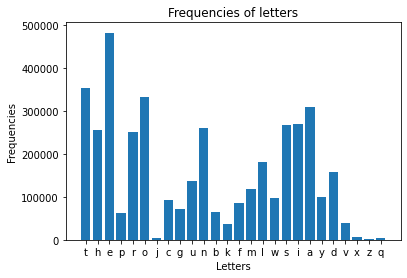

In [15]:
from matplotlib import pyplot

pyplot.title("Frequencies of letters")
pyplot.xlabel("Letters")
pyplot.ylabel("Frequencies")
labels: list[str] = list(shakespeare_letters.keys())
values: list[int] = list(shakespeare_letters.values())
pyplot.bar(labels, values)
